# EDA Project on Digital Ad Campaign

- its important to fine a Key matrix of the advertising to find the profitability of campaign
- this project take a brif look into the data to find the any patern and other analysisi of data
- Pandas use for data cleaning and processing mopdeling seaborn and matplotlib use for data visualization
- Excel file contain data of two marketing campaigns, Google Ads, and a listing site.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preperation and cleaning
- load the dataset using pandas
- we are going to analysed to campaigns differrantly
- their will be two cycle for each eda process

In [2]:
xlx = pd.ExcelFile(r"C:\Users\omcha\Desktop\digikull\Projects Copleted\ad_Data_Analysis\Omnify-Analyst-Intership-Task.xlsx")

In [3]:
df_googlead = pd.read_excel(xlx,"Google Ads Data")
df_listingsite = pd.read_excel(xlx , "Listing Site Data")

## 1.Google ad data analysis

In [4]:
df_googlead

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,NaN,NaT,USA
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,NaN,NaT,USA
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,NaN,NaT,USA
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,NaN,NaT,USA


### 1.1 Cleaning and preparing 
- data contain null values in payment and payment data column.
- for analysis we are using payment column , we fill the null values with zero.
- remove the special charectors like "$" and "," from the payment colum and converted it into float for performing mathematical operations.
- added two new columns week no and month for weekly and monthly visulisations.

In [5]:
df_googlead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

In [6]:
df_googlead.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.925837,16.662679,6.671483,0.028708,0.050239
std,1.900840,46.743636,14.253019,0.167185,0.285312
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,6.800000,0.000000,0.000000
max,12.000000,357.000000,92.090000,1.000000,3.000000


In [7]:
df_googlead.isna().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

In [8]:
df_googlead["Payment ($)"].fillna("0" , inplace = True)

In [9]:
df_googlead.isna().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)         0
Payment Date      410
Country             0
dtype: int64

In [10]:
# removing special charecter $ from payment
df_googlead=df_googlead.replace('\$','',regex=True)

In [11]:
#removing "," from payment convert dtype into float
df_googlead['Payment ($)'] = df_googlead['Payment ($)'].replace(',' , '',regex=True)
df_googlead['Payment ($)'] = df_googlead['Payment ($)'].astype(float)
df_googlead['Payment ($)'].dtype

dtype('float64')

In [12]:
#adding new columns weekno in datframe
df_googlead['Weekno'] = pd.to_datetime(df_googlead['Week'], format='%Y%m%d').dt.strftime('%W')
df_googlead['Weekno'] = 'Week ' + df_googlead['Weekno'].astype(object)
#df_googlead

In [13]:
#adding new coloumn Month in for further analysis
df_googlead['month'] =pd.to_datetime(df_googlead['Week'], format='%m').dt.month_name().str.slice(stop=3)
df_googlead

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Weekno,month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA,Week 04,Jan
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA,Week 04,Jan
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA,Week 04,Jan
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0.0,NaT,USA,Week 04,Jan
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0.0,NaT,USA,Week 04,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,0.0,NaT,USA,Week 18,May
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,0.0,NaT,USA,Week 18,May
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,0.0,NaT,USA,Week 18,May
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,0.0,NaT,USA,Week 18,May


### 1.2 Exploratory Data Analysis and Visuliazation

- for Visuliazation we are going to use matplotlib and seaborn
- creat a new conditional columns to find matrix and KPI of the ad campaign
- We will be analysing success of campaign by analysisng CTC of campaign
- CTR= click through rate = (click/Impressions)*100 to find which weekly change in CTR

In [14]:
weekly_report=df_googlead.groupby('Weekno')["Cost ($)" , "Payment ($)"].sum().reset_index()
weekly_report

C:\Users\omcha\AppData\Local\Temp/ipykernel_6904/3913661635.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_report=df_googlead.groupby('Weekno')["Cost ($)" , "Payment ($)"].sum().reset_index()


,Weekno,Cost ($),Payment ($)
0,Week 04,154.79,2168.0
1,Week 05,192.58,0.0
2,Week 06,216.13,980.0
3,Week 07,235.30,1788.0
4,Week 08,190.90,0.0
5,Week 09,141.40,980.0
6,Week 10,258.20,0.0
7,Week 11,184.36,0.0
8,Week 12,308.73,2388.0
9,Week 13,172.11,0.0


In [15]:
weekly_report['cost_percent'] = (weekly_report['Cost ($)'] / weekly_report['Cost ($)'].sum()) * 100
weekly_report['payment_percent'] = (weekly_report['Payment ($)'] / weekly_report['Payment ($)'].sum()) * 100
weekly_report

,Weekno,Cost ($),Payment ($),cost_percent,payment_percent
0,Week 04,154.79,2168.0,5.550655,18.249158
1,Week 05,192.58,0.0,6.905776,0.000000
2,Week 06,216.13,980.0,7.750262,8.249158
3,Week 07,235.30,1788.0,8.437684,15.050505
4,Week 08,190.90,0.0,6.845533,0.000000
5,Week 09,141.40,980.0,5.070499,8.249158
6,Week 10,258.20,0.0,9.258861,0.000000
7,Week 11,184.36,0.0,6.611013,0.000000
8,Week 12,308.73,2388.0,11.070829,20.101010
9,Week 13,172.11,0.0,6.171737,0.000000


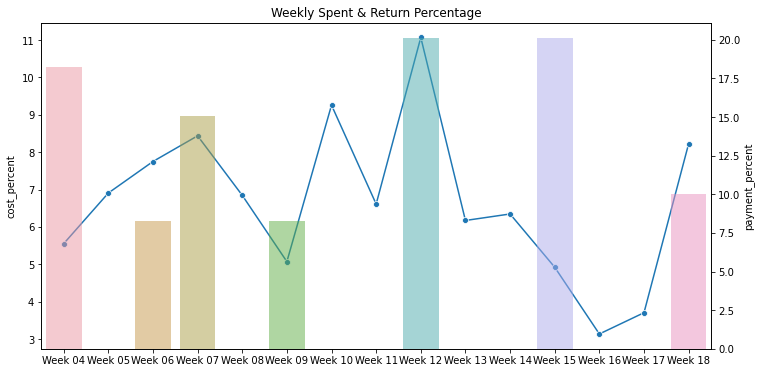

In [16]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = weekly_report['cost_percent'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = weekly_report, x='Weekno', y='payment_percent', alpha=0.5, ax=ax2)
plt.title("Weekly Spent & Return Percentage")
plt.show()

- from the above graph we can see that for Week1, Week4, Week7, Week9 , Week15 the campaign is succesfull as it increases the revenue on the other hand Week5, Week8, Week10, Week11, Week13, Week14, Week16, Week17 were not able to generate any positive revenue where Week6, Week12, week18 given the moderate results

In [17]:
monthly_report=df_googlead.groupby('month')["Cost ($)" , "Payment ($)"].sum().reset_index()
monthly_report['cost_percent'] = (monthly_report['Cost ($)'] / monthly_report['Cost ($)'].sum()) * 100
monthly_report['payment_percent'] = (monthly_report['Payment ($)'] / monthly_report['Payment ($)'].sum()) * 100
monthly_report

C:\Users\omcha\AppData\Local\Temp/ipykernel_6904/4259350375.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_report=df_googlead.groupby('month')["Cost ($)" , "Payment ($)"].sum().reset_index()


,month,Cost ($),Payment ($),cost_percent,payment_percent
0,Apr,504.81,2388.0,18.102113,20.101010
1,Feb,834.91,2768.0,29.939254,23.299663
2,Jan,154.79,2168.0,5.550655,18.249158
3,Mar,1064.80,3368.0,38.182940,28.350168
4,May,229.37,1188.0,8.225038,10.000000


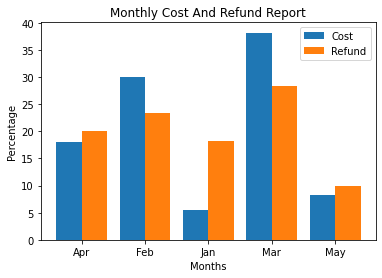

In [18]:
X_axis = np.arange(len(monthly_report.month))
  
plt.bar(X_axis - 0.2, monthly_report.cost_percent, 0.4, label = 'Cost')
plt.bar(X_axis + 0.2, monthly_report.payment_percent, 0.4, label = 'Refund')
  
plt.xticks(X_axis, monthly_report.month)
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.title("Monthly Cost And Refund Report")
plt.legend()
plt.show()


- from monthly report we can we say that the january month campaign is more succesfull than the others so as our previous weekly analysis the high refund month may from January month and week no arent on its place correctly

In [19]:
#CTR= click through rate = (click/Impressions)*100 to find which weekly change in CTR
weekly_CTR=df_googlead.groupby('Week')["Clicks" , "Impressions"].sum().reset_index()
weekly_CTR = weekly_CTR.set_index("Week")
weekly_CTR

C:\Users\omcha\AppData\Local\Temp/ipykernel_6904/357162401.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_CTR=df_googlead.groupby('Week')["Clicks" , "Impressions"].sum().reset_index()


,Clicks,Impressions
Week,,
2021-01-25,15,319
2021-02-01,19,373
2021-02-08,21,364
2021-02-15,35,671
2021-02-22,22,478
2021-03-01,14,407
2021-03-08,34,503
2021-03-15,22,468
2021-03-22,46,659


In [20]:
weekly_CTR['CTR %']=(weekly_CTR.Clicks/weekly_CTR.Impressions)*100
weekly_CTR

,Clicks,Impressions,CTR %
Week,,,
2021-01-25,15,319,4.702194
2021-02-01,19,373,5.093834
2021-02-08,21,364,5.769231
2021-02-15,35,671,5.216095
2021-02-22,22,478,4.602510
2021-03-01,14,407,3.439803
2021-03-08,34,503,6.759443
2021-03-15,22,468,4.700855
2021-03-22,46,659,6.980273


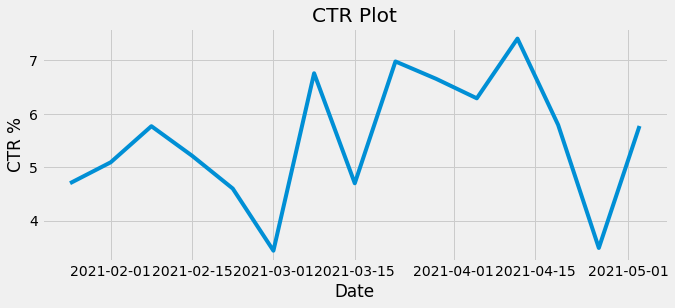

In [21]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 4))
plt.xlabel("Date")
plt.ylabel("CTR %")
plt.title("CTR Plot")
plt.plot(weekly_CTR["CTR %"])
plt.show()

- The CTR% is more in month of april so that there is more reach to the customers but from the previous analysis in january the more purchases done  

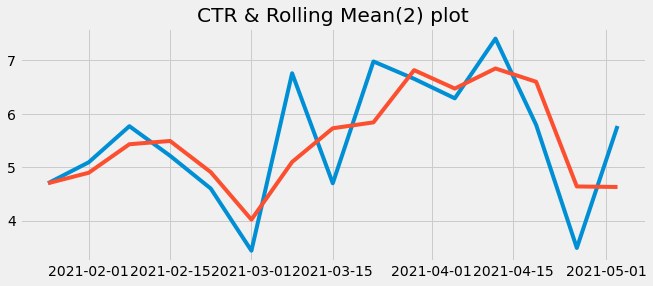

In [22]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 4))
plt.title("CTR & Rolling Mean(2) plot")
plt.plot(weekly_CTR["CTR %"])
plt.plot(weekly_CTR.rolling(window = 2, min_periods=1).mean()["CTR %"])
plt.show()


## 2.Listing Site Data analysis

In [23]:
df_listingsite

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,2020-10-20 00:00:00,13.00,1.0,NaN,2.00,Capterra,UNITED STATES,NaN,NaN,NaT
1,Omnify,Dance Studio,2020-10-20 00:00:00,20.00,1.0,NaN,2.00,Capterra,UNITED KINGDOM,NaN,NaN,NaT
2,Omnify,Personal Trainer,2020-10-20 00:00:00,6.00,1.0,NaN,2.00,Capterra,SINGAPORE,NaN,NaN,NaT
3,Omnify,Scheduling,2020-10-20 00:00:00,59.00,1.0,NaN,2.00,GetApp,UNITED STATES,NaN,NaN,NaT
4,Omnify,Class Registration,2020-10-21 00:00:00,6.00,1.0,NaN,2.00,Capterra,AUSTRALIA,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
2086,Omnify,Class Registration,04-30-2021,10.00,1.0,NaN,10.75,Capterra,United States,NaN,NaN,NaT
2087,Omnify,Club Management,04-30-2021,1.00,1.0,NaN,12.25,Software Advice,United Kingdom,NaN,NaN,NaT
2088,Omnify,Coaching,04-30-2021,14.67,3.0,NaN,6.00,Capterra,United States,NaN,NaN,NaT
2089,Omnify,Dance Studio,04-30-2021,8.00,1.0,NaN,11.50,Capterra,United Kingdom,NaN,NaN,NaT


In [24]:
df_listingsite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   object        
 3   Average Position  2090 non-null   float64       
 4   Clicks            2090 non-null   float64       
 5   Leads             163 non-null    float64       
 6   Money Spent ($)   2089 non-null   float64       
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              14 non-null     object        
 11  Paid Date         13 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 196.2+ KB


In [25]:
df_listingsite.describe()

,Average Position,Clicks,Leads,Money Spent ($),Prospects
count,2090.000000,2090.000000,163.000000,2089.000000,66.000000
mean,10.731464,1.663636,1.141104,12.074318,1.030303
std,11.219817,2.798869,0.542938,39.172291,0.172733
min,0.000000,1.000000,1.000000,2.000000,1.000000
25%,3.000000,1.000000,1.000000,2.000000,1.000000
50%,8.000000,1.000000,1.000000,7.250000,1.000000
75%,13.000000,2.000000,1.000000,12.250000,1.000000
max,74.000000,80.000000,6.000000,1460.000000,2.000000


### 2.1 Cleaning and preparing 
- data contain null values in 'Average Position','Clicks','Leads','Prospects'and 'Paid' ,Money Spent columns.
- for analysis we are using payment column , we fill the null values with zero except Money Spent .
- in Money Spent we will fill the null value with average.
- remove the special charectors like "$" and "," from the paid column and converted it into float for performing mathematical operations.
- there spleing errors in Location column ,we change the value of "Uk" into "united kingdom" and "US","USA" into "united states as this are the same contry.
- corvert Location Column into lower case.
- add a new  conditional column base on paid so that we can see how many prospect made a purchase and to calculate winning rate.

In [26]:
df_listingsite.isna().sum()

Product Name           0
Categories             0
Date of Report         0
Average Position       1
Clicks                 1
Leads               1928
Money Spent ($)        2
Channel                0
Location               0
Prospects           2025
Paid                2077
Paid Date           2078
dtype: int64

In [27]:
missing_percentages = df_listingsite.isna().sum().sort_values(ascending=False) /len(df_listingsite)
missing_percentages

Paid Date           0.993783
Paid                0.993305
Prospects           0.968436
Leads               0.922047
Money Spent ($)     0.000956
Average Position    0.000478
Clicks              0.000478
Product Name        0.000000
Categories          0.000000
Date of Report      0.000000
Channel             0.000000
Location            0.000000
dtype: float64

In [28]:
#fill all the null vaulue with zero
df_listingsite.update(df_listingsite[['Average Position','Clicks','Leads','Prospects','Paid']].fillna(0))

In [29]:
#fill null values in money spent with mean
mean_value=df_listingsite['Money Spent ($)'].mean() 
df_listingsite['Money Spent ($)'].fillna(value=mean_value, inplace=True)
# we can fill the value based on the money spent of perticular channel but as the missing percentage is negligible
#we filled it will fill it with mean of all values.

In [30]:
# removing special charecter $ from payment
df_listingsite=df_listingsite.replace('\$','',regex=True)
#removing "," from paid convert dtype into float
df_listingsite['Paid'] = df_listingsite['Paid'].replace(',' , '',regex=True)
df_listingsite['Paid'] = df_listingsite['Paid'].astype(float)
df_listingsite.Paid.dtype

dtype('float64')

In [31]:
#we are going to use Location column for further analysis cheak the unique value of location to remove duplicates
df_listingsite.Location.unique()

array(['UNITED STATES', 'UNITED KINGDOM', 'SINGAPORE', 'AUSTRALIA',
       'CANADA', 'Middle East', 'USA', 'UK', 'US', 'United States',
       'Canada', 'Singapore', 'United Kingdom', 'Australia'], dtype=object)

- as we can see there are same country names with with diferent case 
- 'UK' and 'United Kingdom' is the same contry
- 'USA','US','United States' is the same country

In [32]:
#there is type error in Location because of case lets get all the location in lowercase and change name of UK USA and US
df_listingsite.loc[df_listingsite["Location"] == 'UK',"Location"] = 'united kingdom'
df_listingsite.loc[df_listingsite["Location"] == 'US',"Location"] = 'united states'
df_listingsite.loc[df_listingsite["Location"] == 'USA',"Location"] = 'united states'
df_listingsite["Location"] = df_listingsite["Location"].str.lower()

In [33]:
#adding a new  conditional column base on paid so that we can see how many customer made a purchase and to calculate conversion rate
df_listingsite.loc[df_listingsite['Paid'] > 0, 'win'] = 1
df_listingsite.loc[df_listingsite['Paid'] == 0, 'win'] = 0
df_listingsite

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date,win
0,Omnify,Coaching,2020-10-20 00:00:00,13.00,1.0,0.0,2.00,Capterra,united states,0.0,0.0,NaT,0.0
1,Omnify,Dance Studio,2020-10-20 00:00:00,20.00,1.0,0.0,2.00,Capterra,united kingdom,0.0,0.0,NaT,0.0
2,Omnify,Personal Trainer,2020-10-20 00:00:00,6.00,1.0,0.0,2.00,Capterra,singapore,0.0,0.0,NaT,0.0
3,Omnify,Scheduling,2020-10-20 00:00:00,59.00,1.0,0.0,2.00,GetApp,united states,0.0,0.0,NaT,0.0
4,Omnify,Class Registration,2020-10-21 00:00:00,6.00,1.0,0.0,2.00,Capterra,australia,0.0,0.0,NaT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,Omnify,Class Registration,04-30-2021,10.00,1.0,0.0,10.75,Capterra,united states,0.0,0.0,NaT,0.0
2087,Omnify,Club Management,04-30-2021,1.00,1.0,0.0,12.25,Software Advice,united kingdom,0.0,0.0,NaT,0.0
2088,Omnify,Coaching,04-30-2021,14.67,3.0,0.0,6.00,Capterra,united states,0.0,0.0,NaT,0.0
2089,Omnify,Dance Studio,04-30-2021,8.00,1.0,0.0,11.50,Capterra,united kingdom,0.0,0.0,NaT,0.0


### 1.2 Exploratory Data Analysis and Visuliazation

- for Visuliazation we are going to use matplotlib and seaborn
- creat a new conditional columns to find matrix and KPI of the ad campaign
- We will be analysing success of campaign by analysisng CTC ,CPA ,CPW ,Conversion Rate , Prospect Wining rate of campaign
- CTC = cost per click = spend/click
- conversion rate = (prospects/click)*100
- winning rate = (prospect win/prospects)*100
- CPA = cost per action = spend/Prospect Generated(Or Final Desired Action)
- CPW = cost per win = spend/Prospect win

In [34]:
channelwise_rep=df_listingsite.groupby('Channel')["Clicks" , "Leads" ,"Money Spent ($)","Prospects","Paid","win"].sum().reset_index()
channelwise_rep

C:\Users\omcha\AppData\Local\Temp/ipykernel_6904/3638074930.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  channelwise_rep=df_listingsite.groupby('Channel')["Clicks" , "Leads" ,"Money Spent ($)","Prospects","Paid","win"].sum().reset_index()


,Channel,Clicks,Leads,Money Spent ($),Prospects,Paid,win
0,Capterra,2377.0,138.0,19485.998636,50.0,19878.0,12.0
1,GetApp,1039.0,44.0,5449.900000,15.0,1788.0,1.0
2,Software Advice,61.0,4.0,311.500000,3.0,1794.0,1.0


In [35]:
#lets create some new column in our channel report to find profitability of channel
#CTC = cost per click = spend/click
#conversion rate = (closed_enquiry/click)*100
# CPA = cost per action = spend/closed_enquiry(Or Final Desired Action)
#CPW = cost per win

In [36]:
channelwise_rep['CTC'] = channelwise_rep['Money Spent ($)']/channelwise_rep.Clicks
channelwise_rep['conversion_ratio'] =(channelwise_rep.Prospects/channelwise_rep.Clicks)*100
channelwise_rep['Prosp_wining_ratio'] = (channelwise_rep.win/channelwise_rep.Prospects)*100
channelwise_rep['CPA'] = channelwise_rep["Money Spent ($)"]/channelwise_rep["Prospects"]#considerd final action is prospect generation
channelwise_rep['CPW'] = channelwise_rep["Money Spent ($)"]/channelwise_rep["win"]
channelwise_rep 

,Channel,Clicks,Leads,Money Spent ($),Prospects,Paid,win,CTC,conversion_ratio,Prosp_wining_ratio,CPA,CPW
0,Capterra,2377.0,138.0,19485.998636,50.0,19878.0,12.0,8.197728,2.103492,24.000000,389.719973,1623.83322
1,GetApp,1039.0,44.0,5449.900000,15.0,1788.0,1.0,5.245332,1.443696,6.666667,363.326667,5449.90000
2,Software Advice,61.0,4.0,311.500000,3.0,1794.0,1.0,5.106557,4.918033,33.333333,103.833333,311.50000


In [37]:
Channel_matrix= channelwise_rep[["Channel","CTC","conversion_ratio","Prosp_wining_ratio" ,"CPA" ,"CPW"]]
Channel_matrix

,Channel,CTC,conversion_ratio,Prosp_wining_ratio,CPA,CPW
0,Capterra,8.197728,2.103492,24.000000,389.719973,1623.83322
1,GetApp,5.245332,1.443696,6.666667,363.326667,5449.90000
2,Software Advice,5.106557,4.918033,33.333333,103.833333,311.50000


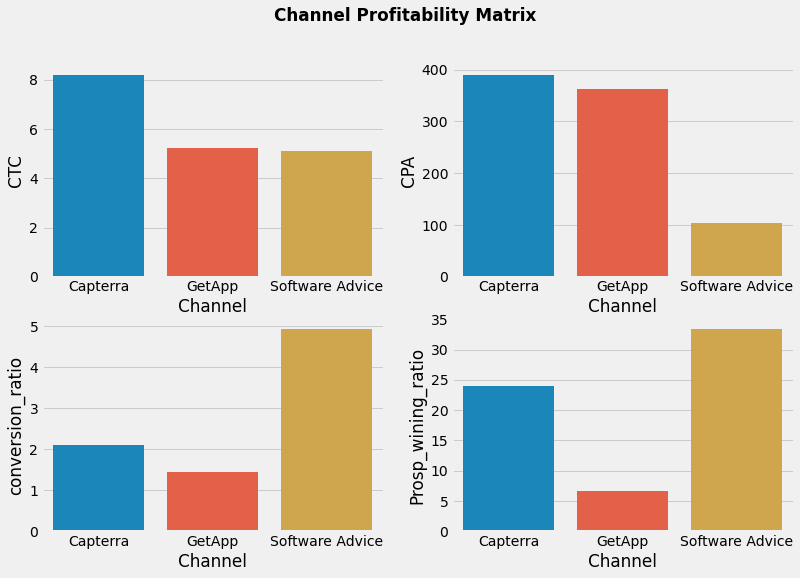

In [40]:
fig, axes = plt.subplots(2,2 ,figsize=(12,8))
fig.suptitle("Channel Profitability Matrix" , fontweight = "bold")
sns.barplot(ax=axes[0,0], x=Channel_matrix.Channel, y=Channel_matrix.CTC)
sns.barplot(ax=axes[0,1], x=Channel_matrix.Channel, y=Channel_matrix.CPA)
sns.barplot(ax=axes[1,0], x=Channel_matrix.Channel, y=Channel_matrix.conversion_ratio)
sns.barplot(ax=axes[1,1], x=Channel_matrix.Channel, y=Channel_matrix.Prosp_wining_ratio)
plt.show()

- we analysing all the column basis on channels cost per action and cost per click is more in capterra but on other hand conversion ration and winning ration is camparetively low we can see that software Advise has more prominant clicks who can convert into prospect but the clicksin capterra is way more than other two channel

In [41]:
categorywise_rep=df_listingsite.groupby('Categories')["Clicks" , "Leads" ,"Money Spent ($)","Prospects","Paid","win"].sum().reset_index()
categorywise_rep                                                     

C:\Users\omcha\AppData\Local\Temp/ipykernel_6904/894277447.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  categorywise_rep=df_listingsite.groupby('Categories')["Clicks" , "Leads" ,"Money Spent ($)","Prospects","Paid","win"].sum().reset_index()


,Categories,Clicks,Leads,Money Spent ($),Prospects,Paid,win
0,Camp Management,24.0,0.0,48.000000,0.0,0.0,0.0
1,Class Registration,362.0,29.0,2910.500000,16.0,4303.0,4.0
2,Club Management,37.0,1.0,257.574318,1.0,0.0,0.0
3,Coaching,278.0,6.0,1003.250000,1.0,0.0,0.0
4,Dance Studio,47.0,2.0,202.250000,1.0,0.0,0.0
5,Fitness,160.0,5.0,1238.500000,5.0,1188.0,1.0
6,Gymnastics,3.0,0.0,6.000000,0.0,0.0,0.0
7,Martial Arts,1.0,0.0,2.000000,0.0,0.0,0.0
8,Membership Management,482.0,32.0,4273.850000,10.0,1788.0,1.0
9,Music School,12.0,0.0,42.000000,0.0,0.0,0.0


In [42]:
categorywise_rep['CTC'] = categorywise_rep['Money Spent ($)']/categorywise_rep.Clicks
categorywise_rep['conversion_ratio'] =(categorywise_rep.Prospects/categorywise_rep.Clicks)*100
categorywise_rep['Prosp_wining_ratio'] = (categorywise_rep.win/categorywise_rep.Prospects)*100
categorywise_rep['CPA'] = categorywise_rep["Money Spent ($)"]/categorywise_rep["Prospects"] #considerd final action is prospect generation
categorywise_rep['CPW'] = channelwise_rep["Money Spent ($)"]/channelwise_rep["win"]
categorywise_rep 

,Categories,Clicks,Leads,Money Spent ($),Prospects,Paid,win,CTC,conversion_ratio,Prosp_wining_ratio,CPA,CPW
0,Camp Management,24.0,0.0,48.000000,0.0,0.0,0.0,2.000000,0.000000,NaN,inf,1623.83322
1,Class Registration,362.0,29.0,2910.500000,16.0,4303.0,4.0,8.040055,4.419890,25.000000,181.906250,5449.90000
2,Club Management,37.0,1.0,257.574318,1.0,0.0,0.0,6.961468,2.702703,0.000000,257.574318,311.50000
3,Coaching,278.0,6.0,1003.250000,1.0,0.0,0.0,3.608813,0.359712,0.000000,1003.250000,NaN
4,Dance Studio,47.0,2.0,202.250000,1.0,0.0,0.0,4.303191,2.127660,0.000000,202.250000,NaN
5,Fitness,160.0,5.0,1238.500000,5.0,1188.0,1.0,7.740625,3.125000,20.000000,247.700000,NaN
6,Gymnastics,3.0,0.0,6.000000,0.0,0.0,0.0,2.000000,0.000000,NaN,inf,NaN
7,Martial Arts,1.0,0.0,2.000000,0.0,0.0,0.0,2.000000,0.000000,NaN,inf,NaN
8,Membership Management,482.0,32.0,4273.850000,10.0,1788.0,1.0,8.866909,2.074689,10.000000,427.385000,NaN
9,Music School,12.0,0.0,42.000000,0.0,0.0,0.0,3.500000,0.000000,NaN,inf,NaN


In [43]:
category_matrix= categorywise_rep[["Categories","CTC","conversion_ratio","Prosp_wining_ratio" ,"CPA","CPW"]]
category_matrix

,Categories,CTC,conversion_ratio,Prosp_wining_ratio,CPA,CPW
0,Camp Management,2.000000,0.000000,NaN,inf,1623.83322
1,Class Registration,8.040055,4.419890,25.000000,181.906250,5449.90000
2,Club Management,6.961468,2.702703,0.000000,257.574318,311.50000
3,Coaching,3.608813,0.359712,0.000000,1003.250000,NaN
4,Dance Studio,4.303191,2.127660,0.000000,202.250000,NaN
5,Fitness,7.740625,3.125000,20.000000,247.700000,NaN
6,Gymnastics,2.000000,0.000000,NaN,inf,NaN
7,Martial Arts,2.000000,0.000000,NaN,inf,NaN
8,Membership Management,8.866909,2.074689,10.000000,427.385000,NaN
9,Music School,3.500000,0.000000,NaN,inf,NaN


In [44]:
category_matrix.update(category_matrix[["Prosp_wining_ratio" ,"CPW"]].fillna(0))
category_matrix.replace([np.inf], 0, inplace=True)
category_matrix

C:\Users\omcha\anaconda3\lib\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)
C:\Users\omcha\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Categories,CTC,conversion_ratio,Prosp_wining_ratio,CPA,CPW
0,Camp Management,2.000000,0.000000,0.000000,0.000000,1623.83322
1,Class Registration,8.040055,4.419890,25.000000,181.906250,5449.90000
2,Club Management,6.961468,2.702703,0.000000,257.574318,311.50000
3,Coaching,3.608813,0.359712,0.000000,1003.250000,0.00000
4,Dance Studio,4.303191,2.127660,0.000000,202.250000,0.00000
5,Fitness,7.740625,3.125000,20.000000,247.700000,0.00000
6,Gymnastics,2.000000,0.000000,0.000000,0.000000,0.00000
7,Martial Arts,2.000000,0.000000,0.000000,0.000000,0.00000
8,Membership Management,8.866909,2.074689,10.000000,427.385000,0.00000
9,Music School,3.500000,0.000000,0.000000,0.000000,0.00000


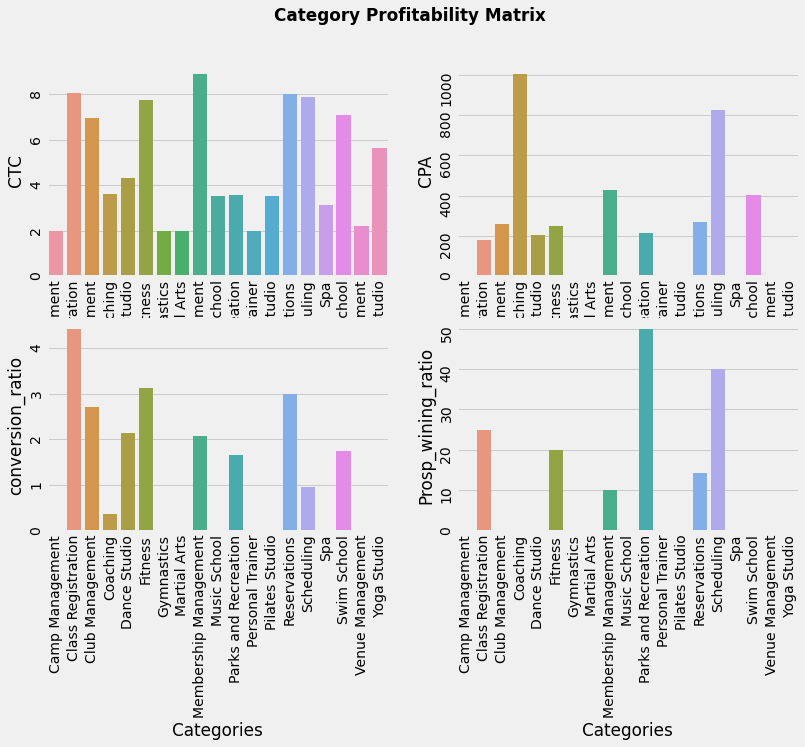

In [45]:
fig, axes = plt.subplots(2, 2 ,figsize=(12,8))
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
fig.suptitle("Category Profitability Matrix" , fontweight = "bold")
sns.barplot(ax=axes[0,0], x=category_matrix.Categories, y=category_matrix.CTC)
sns.barplot(ax=axes[0,1], x=category_matrix.Categories, y=category_matrix.CPA)
sns.barplot(ax=axes[1,0], x=category_matrix.Categories, y=category_matrix.conversion_ratio)
sns.barplot(ax=axes[1,1], x=category_matrix.Categories, y=category_matrix.Prosp_wining_ratio)
plt.show()
#it will be more efficietnt after ploting graph for values that greater than zero

- we have to more focused on non performing categories as we can see that Camp Managment , Gymnastic ,Martial Arts ,Music school ,personal trainer,pilats studio and spa are the categories where conversion ratio is surprisingly low and this category majorly comes in physical fitness group on the other hand categories like coaching , club managmnet,dance studio ,swim school do have good conversion ration but some how we are not winning the prospects we need to focus on this categories how can we increase winning ratio and generate more revenue

In [46]:
countrywise_rep = df_listingsite.groupby('Location')["Clicks" , "Leads" ,"Money Spent ($)","Prospects","Paid","win"].sum().reset_index()
countrywise_rep

C:\Users\omcha\AppData\Local\Temp/ipykernel_6904/4098099321.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  countrywise_rep = df_listingsite.groupby('Location')["Clicks" , "Leads" ,"Money Spent ($)","Prospects","Paid","win"].sum().reset_index()


,Location,Clicks,Leads,Money Spent ($),Prospects,Paid,win
0,australia,279.0,8.0,1224.250000,4.0,0.0,0.0
1,canada,251.0,11.0,1369.750000,5.0,2768.0,2.0
2,middle east,1.0,1.0,12.074318,1.0,0.0,0.0
3,singapore,471.0,28.0,2243.250000,8.0,1788.0,1.0
4,united kingdom,713.0,21.0,4361.850000,7.0,4768.0,2.0
5,united states,1762.0,117.0,16036.224318,43.0,14136.0,9.0


In [47]:
countrywise_rep['CTC'] = round(countrywise_rep['Money Spent ($)']/countrywise_rep.Clicks ,2)
countrywise_rep['conversion_ratio'] =round((countrywise_rep.Prospects/countrywise_rep.Clicks)*100 ,2)
countrywise_rep['Prosp_wining_ratio'] = round ((countrywise_rep.win/countrywise_rep.Prospects)*100,2)
countrywise_rep['CPA'] = round(countrywise_rep["Money Spent ($)"]/countrywise_rep["Prospects"] ,2) #considerd final action is prospect generation
countrywise_rep['CPW'] = round (countrywise_rep["Money Spent ($)"]/countrywise_rep["win"] ,2)
countrywise_rep 

,Location,Clicks,Leads,Money Spent ($),Prospects,Paid,win,CTC,conversion_ratio,Prosp_wining_ratio,CPA,CPW
0,australia,279.0,8.0,1224.250000,4.0,0.0,0.0,4.39,1.43,0.00,306.06,inf
1,canada,251.0,11.0,1369.750000,5.0,2768.0,2.0,5.46,1.99,40.00,273.95,684.88
2,middle east,1.0,1.0,12.074318,1.0,0.0,0.0,12.07,100.00,0.00,12.07,inf
3,singapore,471.0,28.0,2243.250000,8.0,1788.0,1.0,4.76,1.70,12.50,280.41,2243.25
4,united kingdom,713.0,21.0,4361.850000,7.0,4768.0,2.0,6.12,0.98,28.57,623.12,2180.93
5,united states,1762.0,117.0,16036.224318,43.0,14136.0,9.0,9.10,2.44,20.93,372.94,1781.80


In [48]:
#filling null and infinte value
countrywise_rep.update(category_matrix["Prosp_wining_ratio"].fillna(0))
countrywise_rep.replace([np.inf], 0, inplace=True)


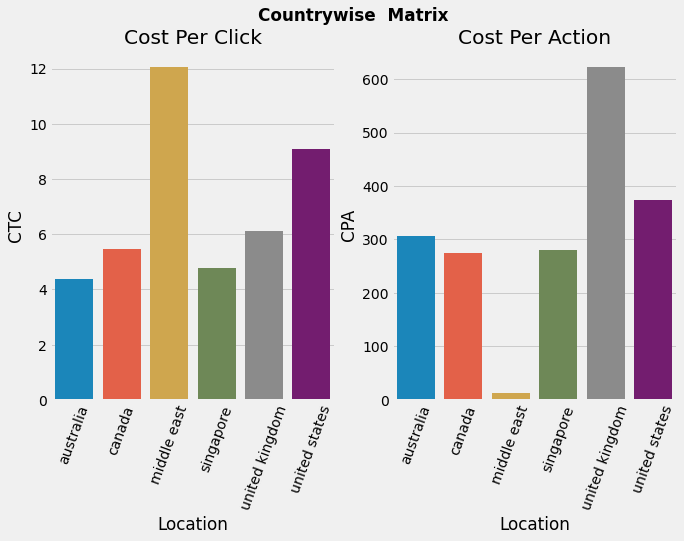

In [49]:
fig, axes = plt.subplots(1,2,figsize=(10,6))
fig.suptitle("Countrywise  Matrix" , fontweight = "bold")
axes[0].set_title('Cost Per Click')
axes[1].set_title('Cost Per Action')
a=sns.barplot(ax=axes[0], x=countrywise_rep.Location, y=countrywise_rep.CTC)
b=sns.barplot(ax=axes[1], x=countrywise_rep.Location, y=countrywise_rep.CPA)
a.set_xticklabels(a.get_xticklabels(), rotation=70)
b.set_xticklabels(b.get_xticklabels(), rotation=70)
plt.show()

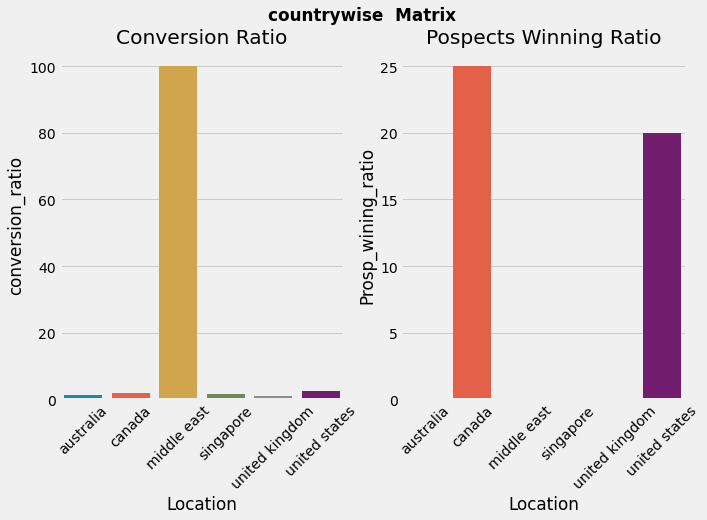

In [50]:
fig, axes = plt.subplots(1,2,figsize=(10,6))
fig.suptitle("countrywise  Matrix" , fontweight = "bold")
axes[0].set_title('Conversion Ratio')
axes[1].set_title('Pospects Winning Ratio')
a=sns.barplot(ax=axes[0], x=countrywise_rep.Location, y=countrywise_rep.conversion_ratio)
b=sns.barplot(ax=axes[1], x=countrywise_rep.Location, y=countrywise_rep.Prosp_wining_ratio)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
b.set_xticklabels(b.get_xticklabels(), rotation=45)
plt.show()

- the different contry have differnt social understandig so we do need to analysed our data contry wise middle east is more cost consuming area the customer acquasisation is more costly than other countris as we can see in United kingdom CTC is low the CPA is way more that means is cheap to gets click in United kigdom but the Generting the prospect is costly as the conversion ratio in United Kingdom is lowest

In [ ]:
#Export Both Dataframe to use cleaned data in powerbi presentation
#df_listingsite.to_csv(r"C:\Users\omcha\Downloads\listingdata.csv")
#df_googlead.to_csv(r"C:\Users\omcha\Downloads\googlead.csv")

- we can make the ML model on Listing site data in supervised lerning in which we train our machine to find success ratio our ad camping in regresion model where we can give input of lables and train our machine for future prediction